In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data loading
trips_data = pd.read_csv('austin_bikeshare_trips.csv')
stations_data = pd.read_csv('austin_bikeshare_stations.csv')
trips_data


,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...
649226,52.0,0:12:00,90,2571.0,Red River & 8th Street,7.0,2544.0,East 6th & Pedernales St.,2014-07-06 00:12:00,24-Hour Kiosk (Austin B-cycle),9900185926,2014.0
649227,104.0,17:20:44,53,2499.0,City Hall / Lavaca & 2nd,2.0,3619.0,6th & Congress,2017-02-06 17:20:44,Walk Up,13649794,2017.0
649228,240.0,13:12:55,44,2495.0,4th & Congress,11.0,2495.0,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015.0
649229,421.0,14:45:34,106,2494.0,2nd & Congress,5.0,2494.0,2nd & Congress,2016-05-29 14:45:34,Try Before You Buy Special,10219003,2016.0


In [2]:
stations_data

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved
...,...,...,...,...,...,...
67,30.26634,(30.26634 -97.74378),-97.74378,4th & Congress,2495,active
68,30.26780,(30.2678 -97.75189),-97.75189,3rd & West,2552,active
69,30.26960,(30.2696 -97.75332),-97.75332,5th & Bowie,2501,active
70,30.26416,(30.26416 -97.73289),-97.73289,5th & San Marcos,2564,moved


In [24]:
print(trips_data.isnull().sum())
print(stations_data.isnull().sum())

bikeid                0
checkout_time         0
duration_minutes      0
end_station_name      0
start_station_name    0
start_time            0
subscriber_type       0
trip_id               0
Year                  0
Month                 0
Hour                  0
Month_name            0
dtype: int64
latitude      0
location      0
longitude     0
name          0
station_id    0
status        0
dtype: int64


In [3]:
trips_data['Year'] = pd.to_datetime(trips_data['start_time'], format='%Y-%m-%d').dt.year
trips_data['Month'] = pd.to_datetime(trips_data['start_time'], format='%Y-%m-%d').dt.month
trips_data['Hour'] = pd.to_datetime(trips_data['start_time'], format='%Y-%m-%d').dt.hour
trips_data

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year,Year,Month,Hour
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0,2015,3,19
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0,2016,10,2
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0,2016,3,16
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0,2014,11,15
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0,2017,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649226,52.0,0:12:00,90,2571.0,Red River & 8th Street,7.0,2544.0,East 6th & Pedernales St.,2014-07-06 00:12:00,24-Hour Kiosk (Austin B-cycle),9900185926,2014.0,2014,7,0
649227,104.0,17:20:44,53,2499.0,City Hall / Lavaca & 2nd,2.0,3619.0,6th & Congress,2017-02-06 17:20:44,Walk Up,13649794,2017.0,2017,2,17
649228,240.0,13:12:55,44,2495.0,4th & Congress,11.0,2495.0,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015.0,2015,11,13
649229,421.0,14:45:34,106,2494.0,2nd & Congress,5.0,2494.0,2nd & Congress,2016-05-29 14:45:34,Try Before You Buy Special,10219003,2016.0,2016,5,14


In [4]:
del trips_data['end_station_id']
del trips_data['start_station_id']
del trips_data['year']
del trips_data['month']
trips_data

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,start_time,subscriber_type,trip_id,Year,Month,Hour
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015,3,19
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016,10,2
2,578.0,16:28:27,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016,3,16
3,555.0,15:12:00,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014,11,15
4,86.0,15:39:13,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017,4,15
...,...,...,...,...,...,...,...,...,...,...,...
649226,52.0,0:12:00,90,Red River & 8th Street,East 6th & Pedernales St.,2014-07-06 00:12:00,24-Hour Kiosk (Austin B-cycle),9900185926,2014,7,0
649227,104.0,17:20:44,53,City Hall / Lavaca & 2nd,6th & Congress,2017-02-06 17:20:44,Walk Up,13649794,2017,2,17
649228,240.0,13:12:55,44,4th & Congress,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015,11,13
649229,421.0,14:45:34,106,2nd & Congress,2nd & Congress,2016-05-29 14:45:34,Try Before You Buy Special,10219003,2016,5,14


In [5]:
trips_data['Month_name']=trips_data['Month'].astype('str')
trips_data['Month_name'] = trips_data['Month_name'].map({'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'})
trips_data

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,start_time,subscriber_type,trip_id,Year,Month,Hour,Month_name
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015,3,19,March
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016,10,2,October
2,578.0,16:28:27,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016,3,16,March
3,555.0,15:12:00,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014,11,15,November
4,86.0,15:39:13,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017,4,15,April
...,...,...,...,...,...,...,...,...,...,...,...,...
649226,52.0,0:12:00,90,Red River & 8th Street,East 6th & Pedernales St.,2014-07-06 00:12:00,24-Hour Kiosk (Austin B-cycle),9900185926,2014,7,0,July
649227,104.0,17:20:44,53,City Hall / Lavaca & 2nd,6th & Congress,2017-02-06 17:20:44,Walk Up,13649794,2017,2,17,February
649228,240.0,13:12:55,44,4th & Congress,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015,11,13,November
649229,421.0,14:45:34,106,2nd & Congress,2nd & Congress,2016-05-29 14:45:34,Try Before You Buy Special,10219003,2016,5,14,May


In [6]:
for category in trips_data:
    trips_data[category]=trips_data[category].astype('category')
trips_data.dtypes

bikeid                category
checkout_time         category
duration_minutes      category
end_station_name      category
start_station_name    category
start_time            category
subscriber_type       category
trip_id               category
Year                  category
Month                 category
Hour                  category
Month_name            category
dtype: object

In [7]:
trips_data = trips_data.dropna(axis = 0)
print(trips_data.isnull().sum())

bikeid                0
checkout_time         0
duration_minutes      0
end_station_name      0
start_station_name    0
start_time            0
subscriber_type       0
trip_id               0
Year                  0
Month                 0
Hour                  0
Month_name            0
dtype: int64


In [8]:
trips_data

,bikeid,checkout_time,duration_minutes,end_station_name,start_station_name,start_time,subscriber_type,trip_id,Year,Month,Hour,Month_name
0,8.0,19:12:00,41,Trinity & 6th Street,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015,3,19,March
1,141.0,2:06:04,6,South Congress & Academy,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016,10,2,October
2,578.0,16:28:27,13,Convention Center / 4th St. @ MetroRail,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016,3,16,March
3,555.0,15:12:00,80,Toomey Rd @ South Lamar,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014,11,15,November
4,86.0,15:39:13,25,MoPac Pedestrian Bridge @ Veterans Drive,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017,4,15,April
...,...,...,...,...,...,...,...,...,...,...,...,...
649226,52.0,0:12:00,90,Red River & 8th Street,East 6th & Pedernales St.,2014-07-06 00:12:00,24-Hour Kiosk (Austin B-cycle),9900185926,2014,7,0,July
649227,104.0,17:20:44,53,City Hall / Lavaca & 2nd,6th & Congress,2017-02-06 17:20:44,Walk Up,13649794,2017,2,17,February
649228,240.0,13:12:55,44,4th & Congress,4th & Congress,2015-11-18 13:12:55,Walk Up,9900329990,2015,11,13,November
649229,421.0,14:45:34,106,2nd & Congress,2nd & Congress,2016-05-29 14:45:34,Try Before You Buy Special,10219003,2016,5,14,May


In [9]:
trips_data.dtypes

bikeid                category
checkout_time         category
duration_minutes      category
end_station_name      category
start_station_name    category
start_time            category
subscriber_type       category
trip_id               category
Year                  category
Month                 category
Hour                  category
Month_name            category
dtype: object

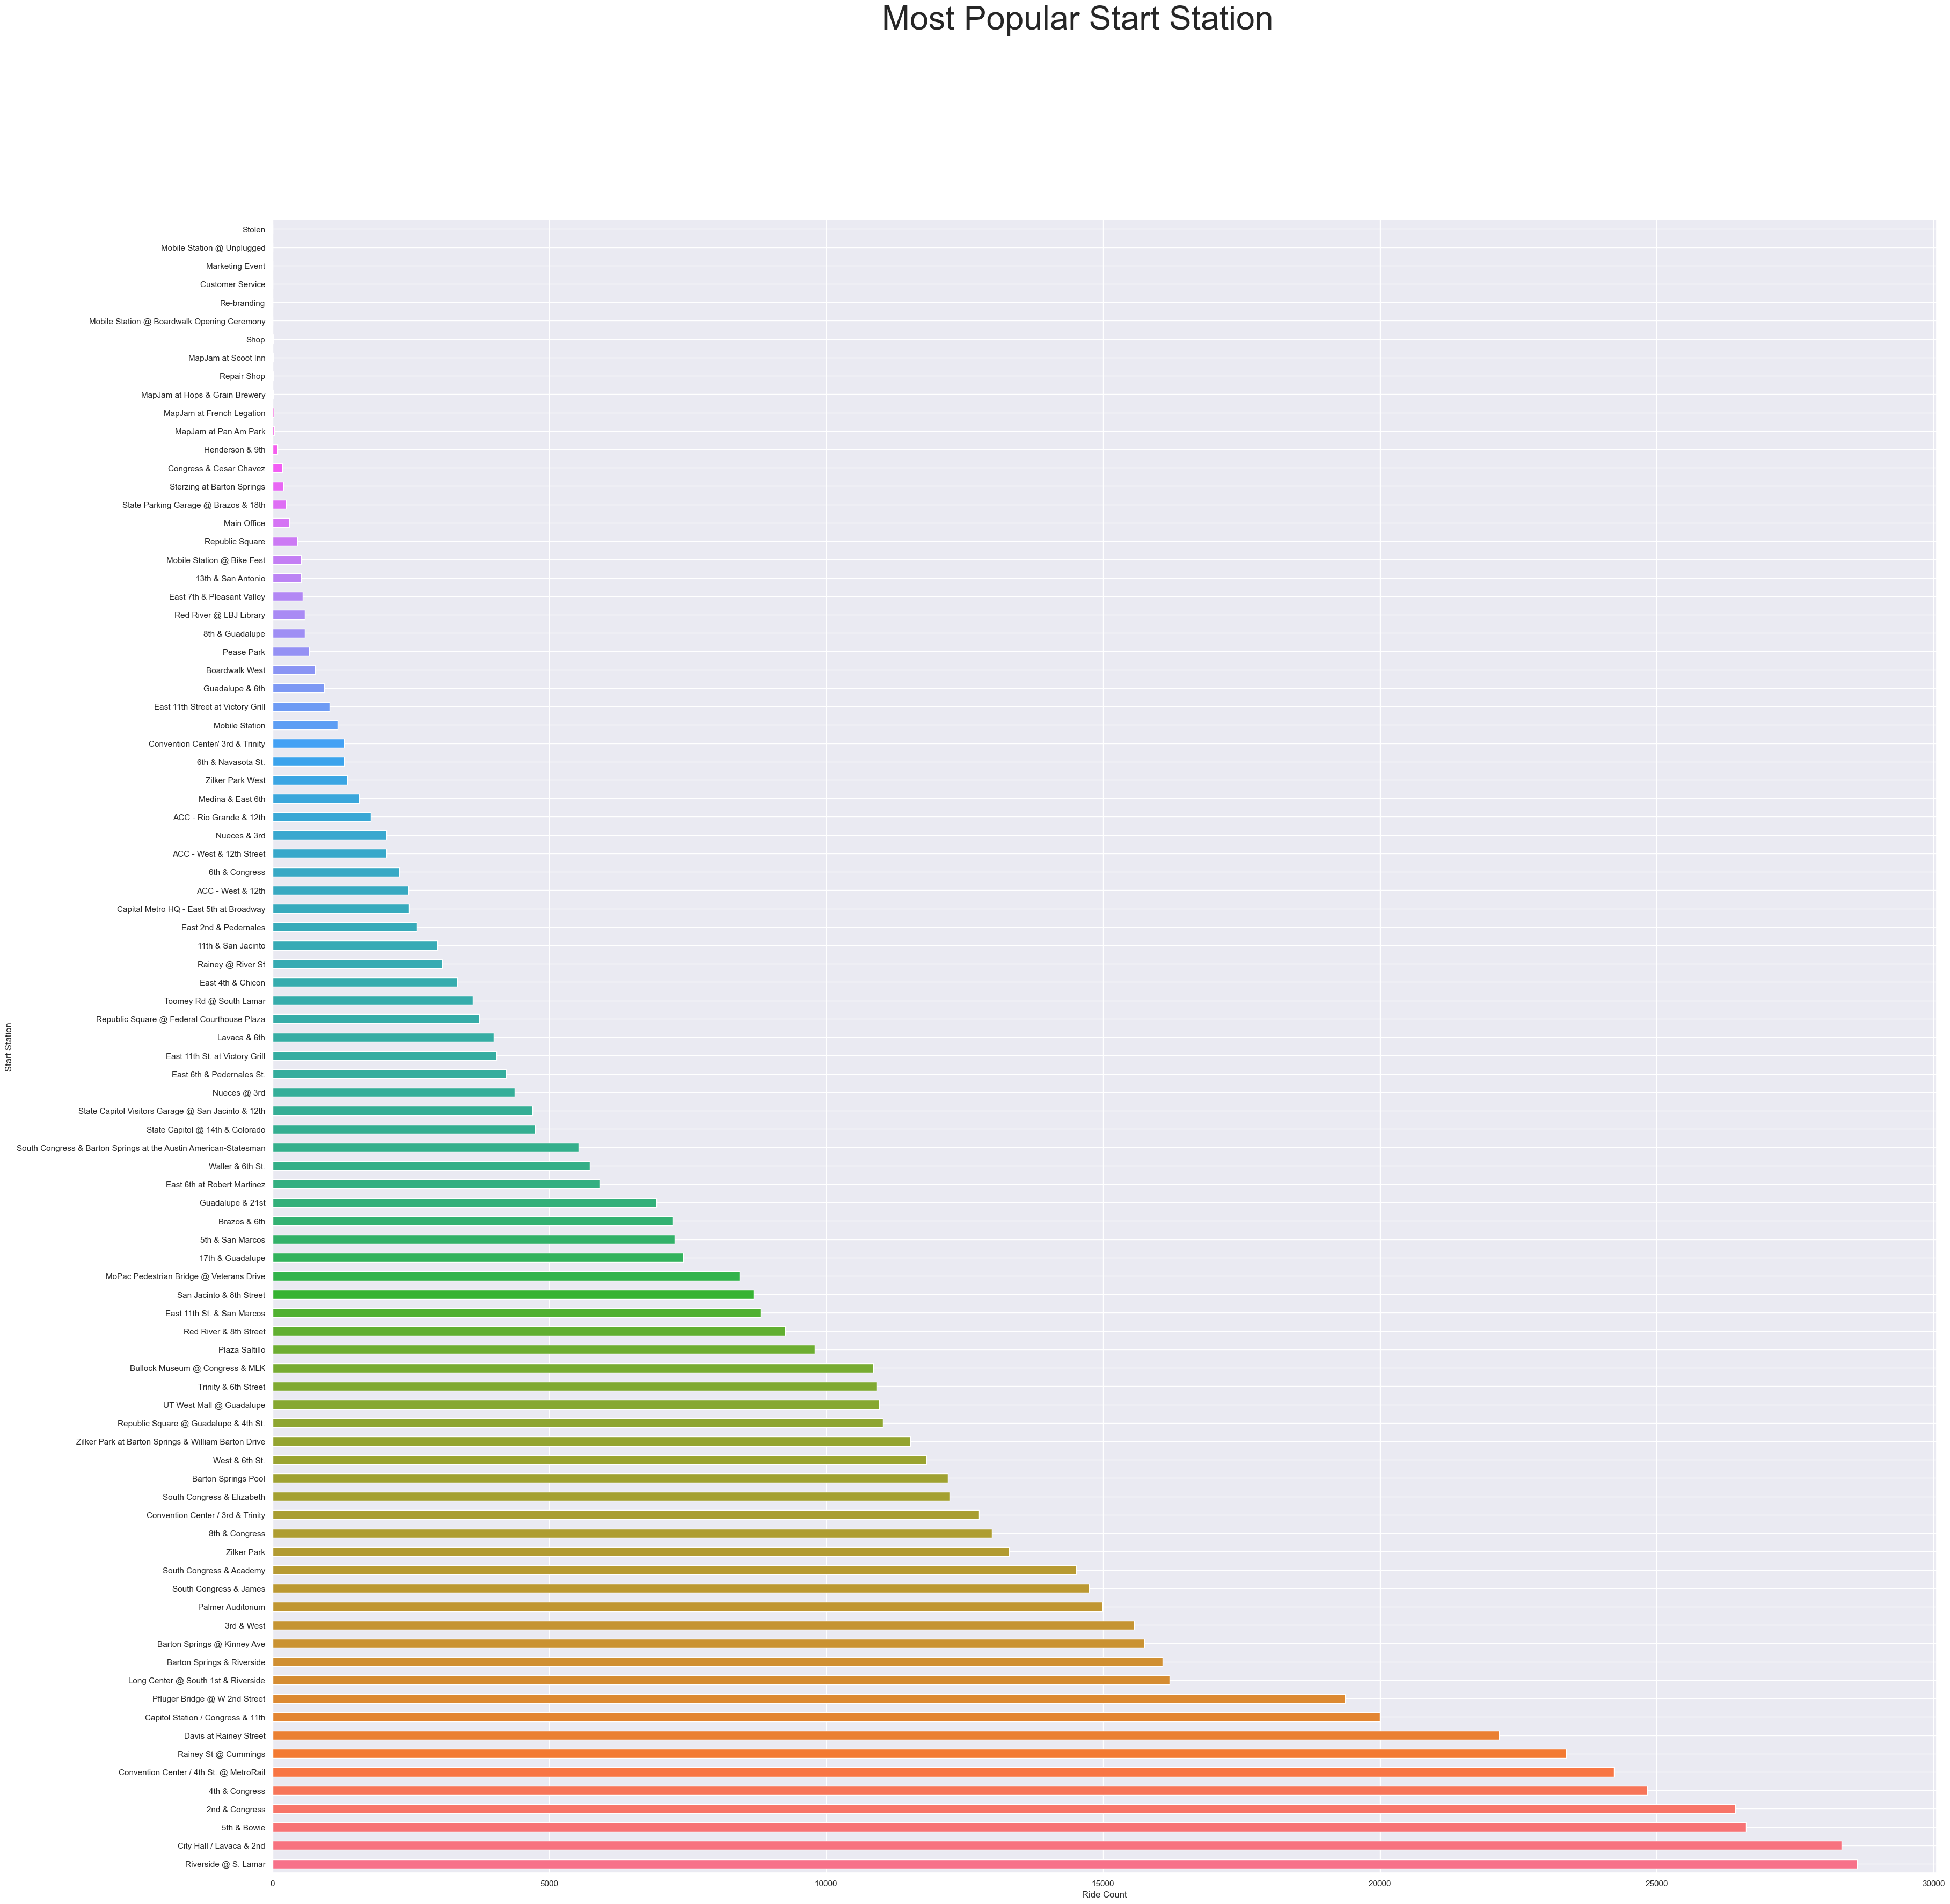

In [22]:
start_station=trips_data['start_station_name'].value_counts();
custom_palette = sns.color_palette("husl", len(start_station))

plt.figure(figsize=(40, 40))
start_station.plot.barh(color=custom_palette)
plt.suptitle("Most Popular Start Station", fontsize=45)
plt.xlabel('Ride Count')
plt.ylabel('Start Station')
plt.show()

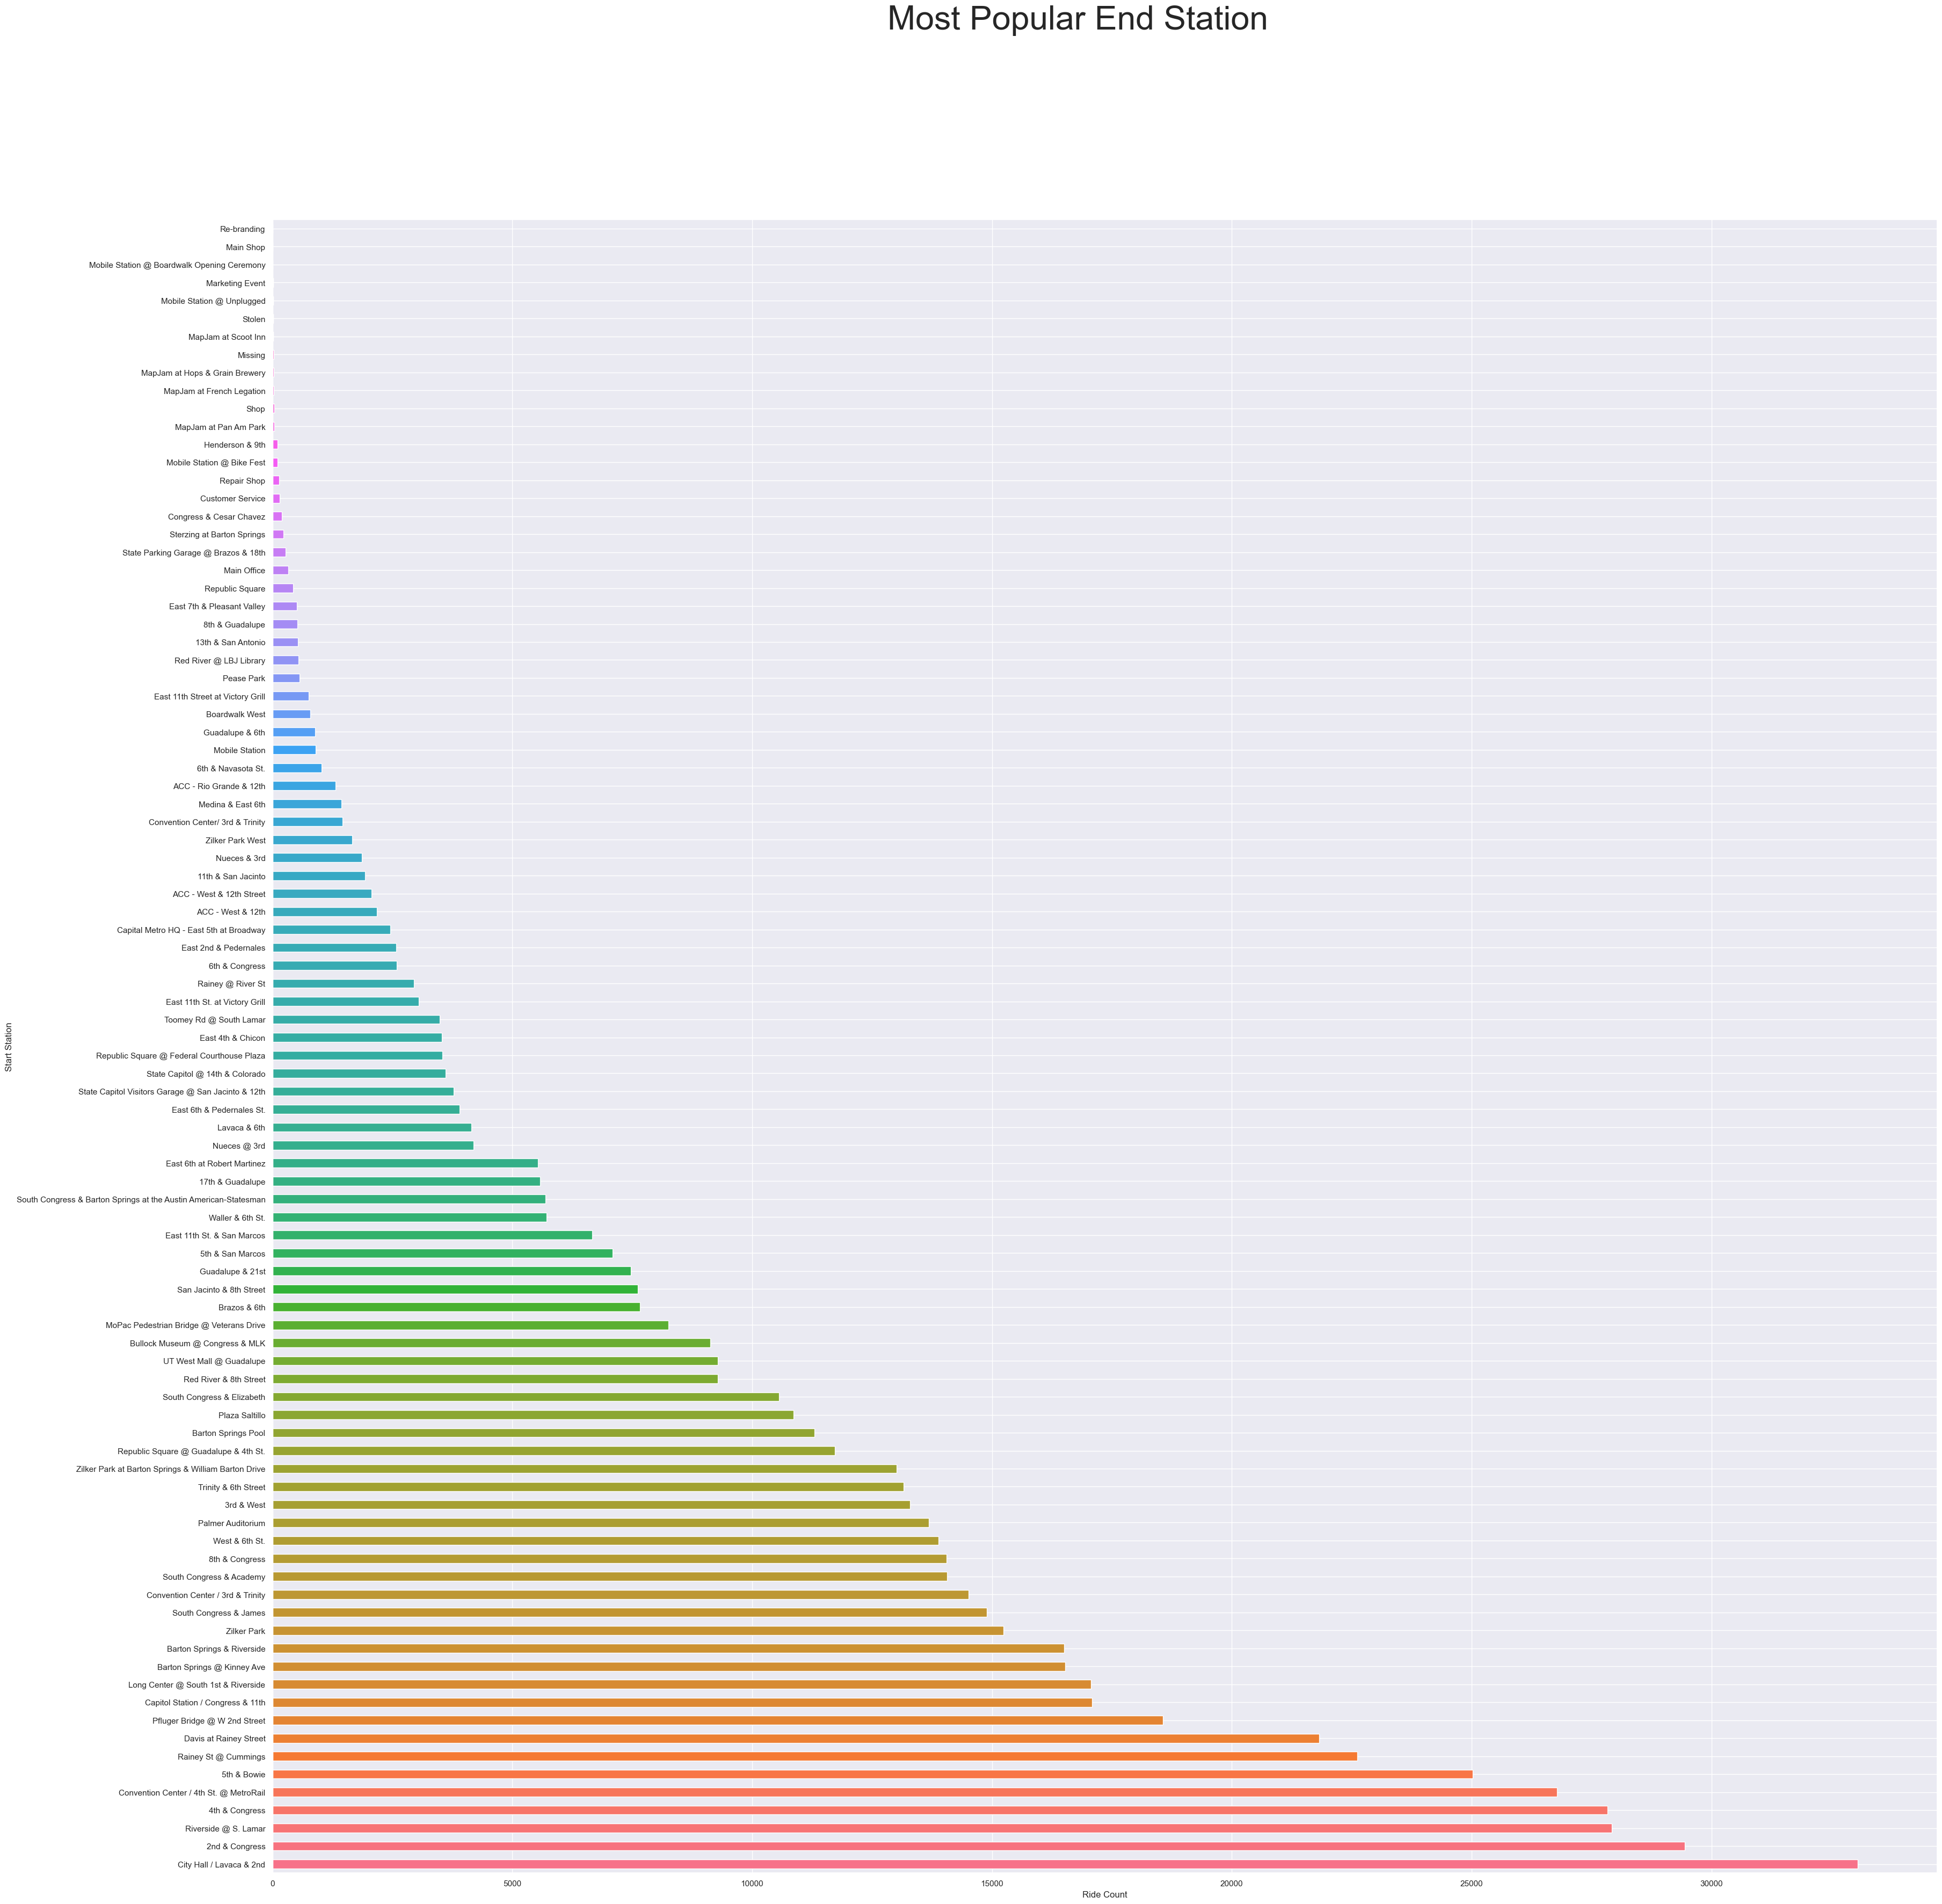

In [23]:
end_station=trips_data['end_station_name'].value_counts();
custom_palette = sns.color_palette("husl", len(end_station))

plt.figure(figsize=(40, 40))
end_station.plot.barh(color=custom_palette)
plt.suptitle("Most Popular End Station", fontsize=45)
plt.xlabel('Ride Count')
plt.ylabel('Start Station')
plt.show()

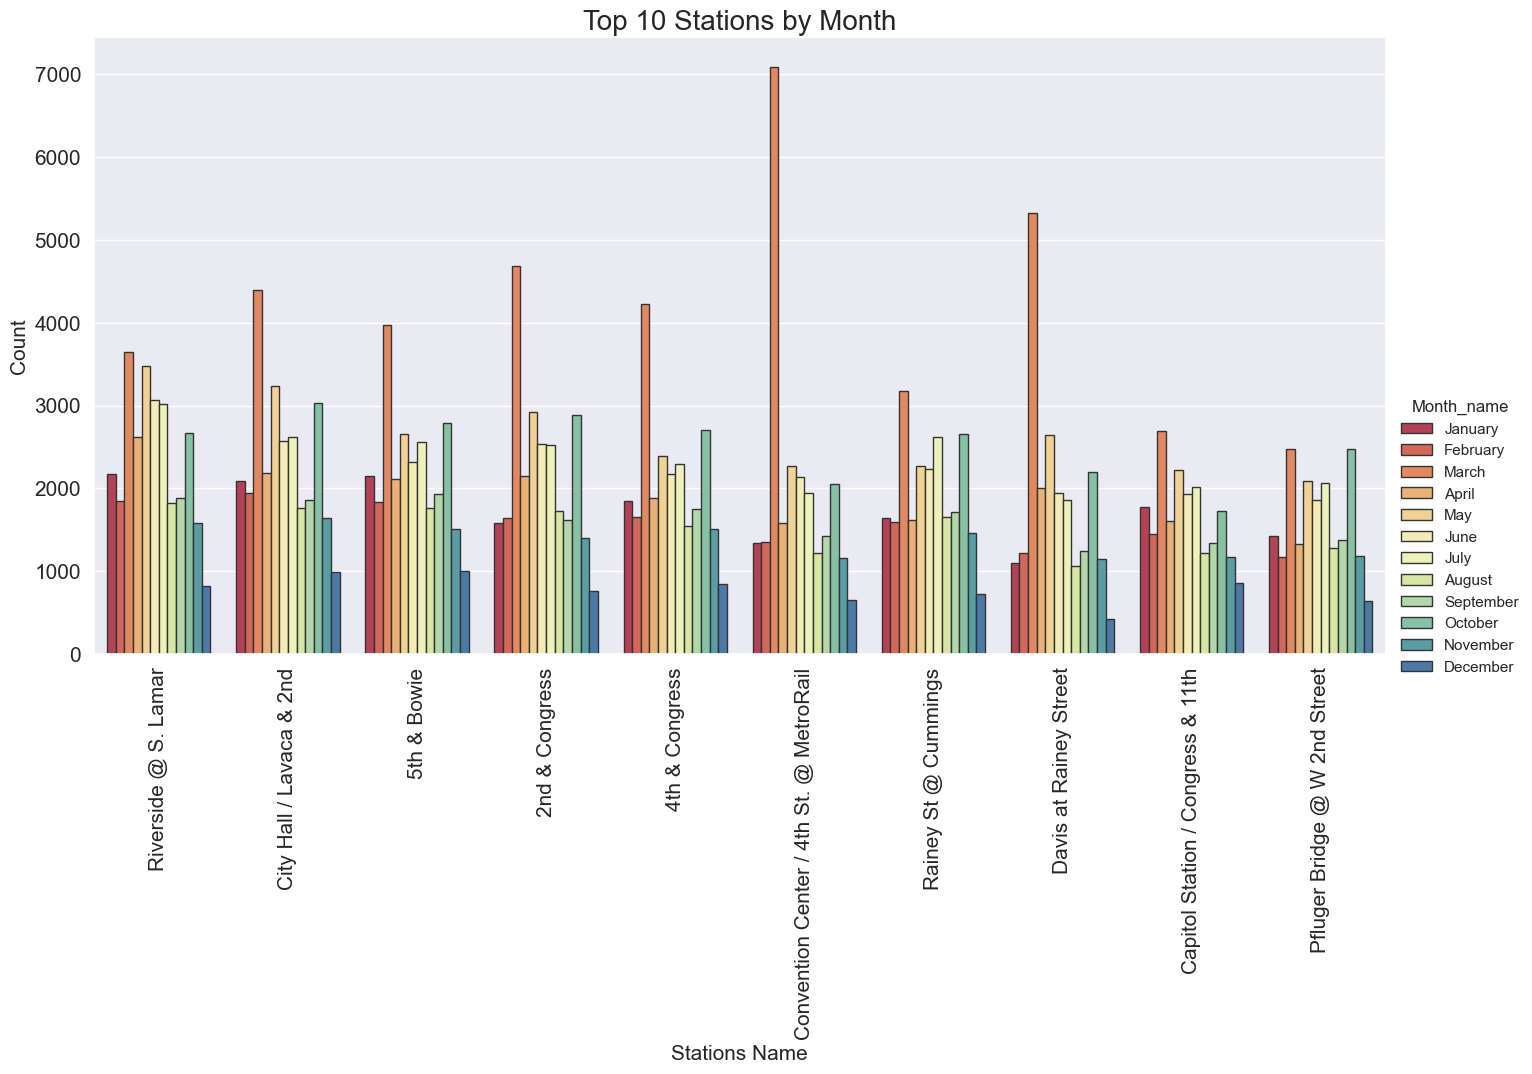

In [25]:
top_stations = sns.catplot(x="start_station_name",
                hue="Month_name",
                hue_order =["January","February","March","April","May","June","July","August","September","October",
                            "November","December"],
                kind="count",
                palette="Spectral",
                edgecolor=".2",
                data=trips_data,
                height=7,
                aspect =2,
                order=pd.value_counts(trips_data['start_station_name']).iloc[:10].index,)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Stations Name',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.title('Top 10 Stations by Month',fontsize=20)
plt.show()


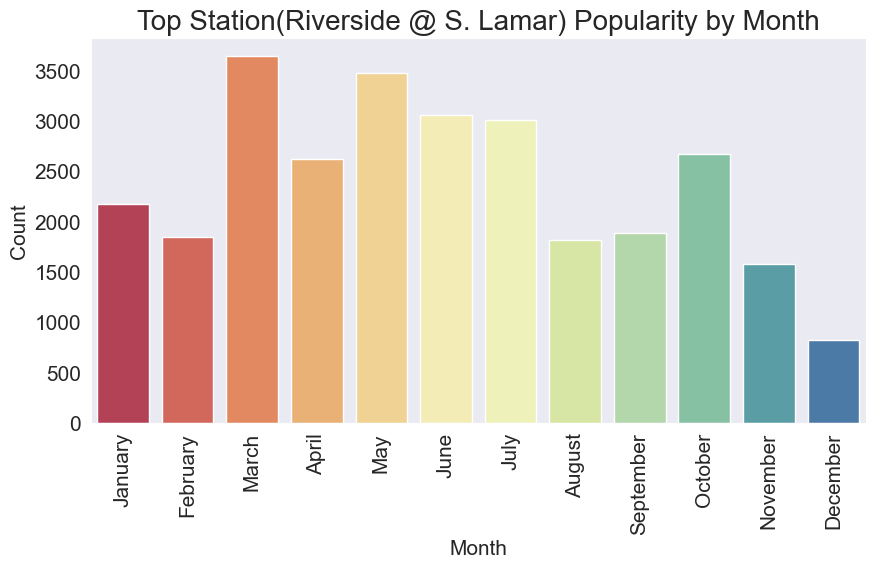

In [13]:
top = trips_data[trips_data['start_station_name']=='Riverside @ S. Lamar']
sns.set_style("dark")
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
g = sns.countplot(x="Month_name", data=top,palette="Spectral",order =["January","February","March","April","May","June","July","August","September","October",
                            "November","December"])
plt.ylabel("Count", fontsize=15)
plt.xlabel("Month", fontsize=15)

plt.title("Top Station(Riverside @ S. Lamar) Popularity by Month", fontsize=20)
plt.xticks(rotation =90)
plt.show()

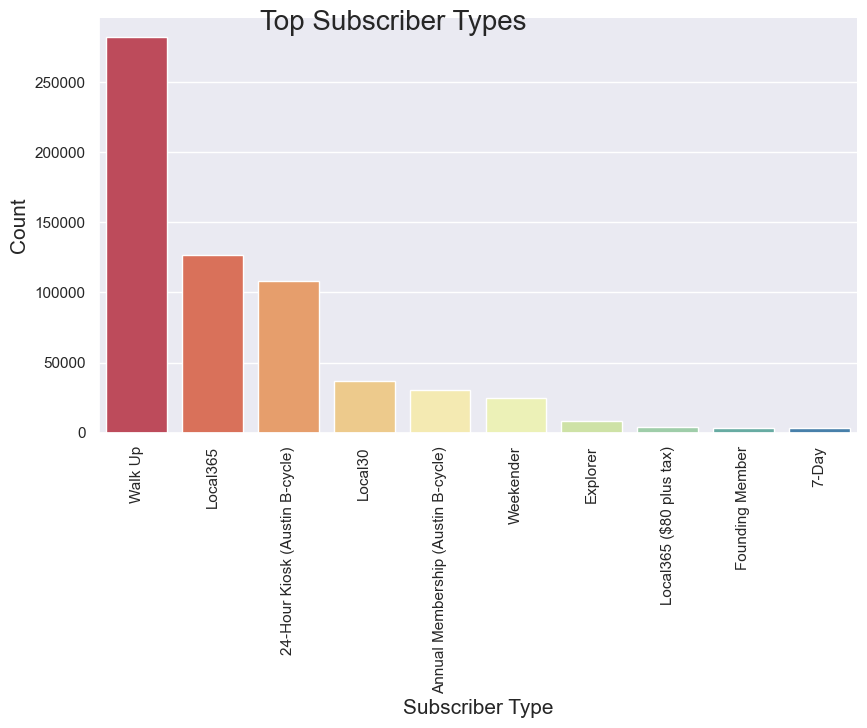

In [14]:
sns.set(font_scale = 1)
subs=sns.catplot(x="subscriber_type",kind="count", palette="Spectral",data = trips_data,order=pd.value_counts(trips_data['subscriber_type']).iloc[:10].index)
subs.set_xticklabels(rotation=90)

subs.fig.set_size_inches(10,5)
subs.fig.suptitle('Top Subscriber Types', fontsize=20)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Subscriber Type", fontsize = 15)


plt.show()

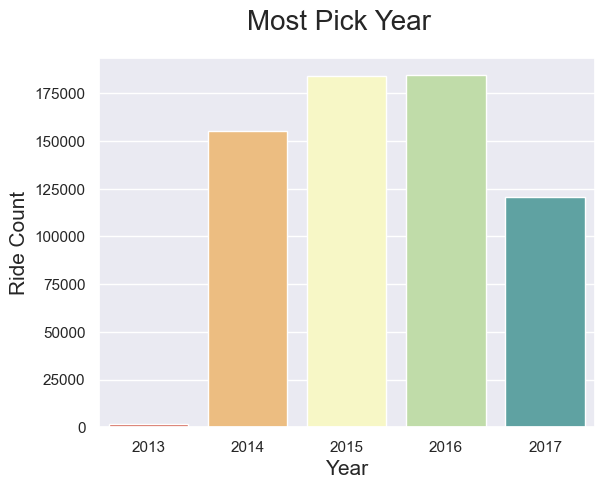

In [15]:
sns.set(font_scale = 1)

checkout = trips_data['Year'].value_counts()
custom_palette = sns.color_palette("Spectral", len(checkout))
order = [2013,2014,2015,2016,2017]

plt.figure()
sns.barplot(x=checkout.index, y=checkout.values, order=order, palette=custom_palette)
plt.suptitle("Most Pick Year", fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ride Count' , fontsize=15)
plt.show()


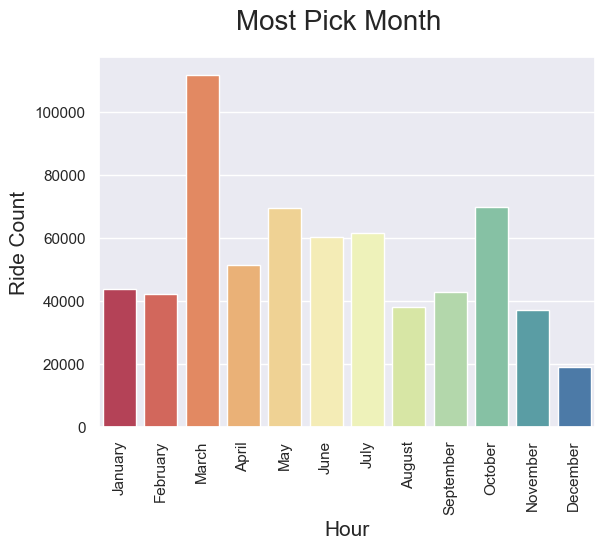

In [16]:
sns.set(font_scale = 1)

checkout = trips_data['Month_name'].value_counts()
custom_palette = sns.color_palette("Spectral", len(checkout))
order = ["January","February","March","April","May","June","July","August","September","October",
                            "November","December"]

plt.figure()
sns.barplot(x=checkout.index, y=checkout.values, order=order, palette=custom_palette)
plt.suptitle("Most Pick Month", fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Ride Count' , fontsize=15)
plt.xticks(rotation =90)
plt.show()

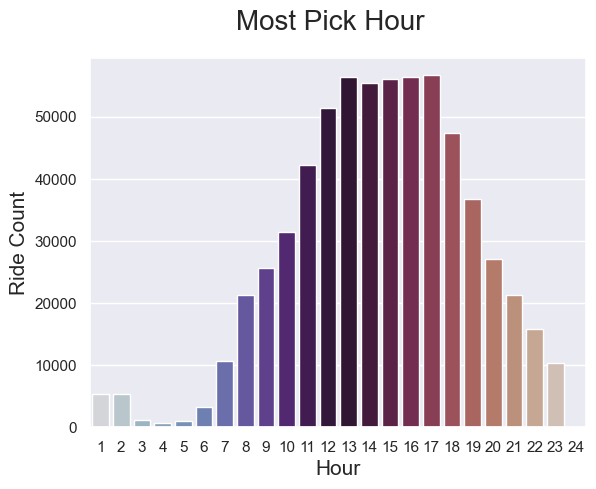

In [17]:
sns.set(font_scale = 1)

checkout = trips_data['Hour'].value_counts()
custom_palette = sns.color_palette("twilight", len(checkout))
order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

plt.figure()
sns.barplot(x=checkout.index, y=checkout.values, order=order, palette=custom_palette)
plt.suptitle("Most Pick Hour", fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Ride Count' , fontsize=15)
plt.show()


In [18]:
pip install pandas folium


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import folium
from IPython.display import display

map_center = [stations_data['latitude'].mean(), stations_data['longitude'].mean()]
bike_map = folium.Map(location=map_center, zoom_start=12)

title = '''<h3 align="center" style="font-size:30px"><b>Active Bike Stations</b></h3>'''
bike_map.get_root().html.add_child(folium.Element(title))

for index, row in stations_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} (ID: {row['station_id']})",
        icon=folium.Icon(color='blue' if row['status'] == 'active' else 'red')
    ).add_to(bike_map)

display(bike_map)


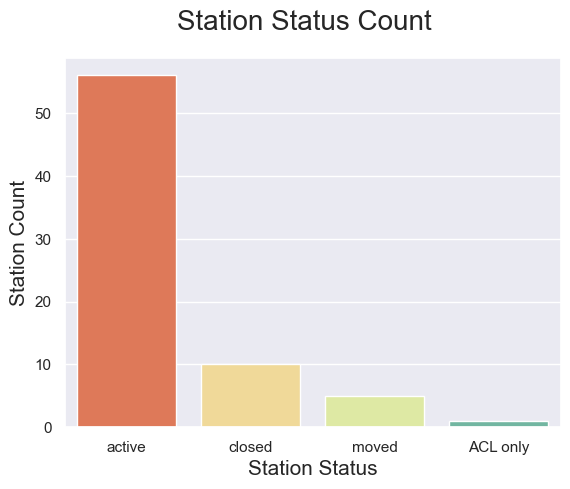

In [20]:
sns.set(font_scale = 1)

checkout = stations_data['status'].value_counts()
custom_palette = sns.color_palette("Spectral", len(checkout))

plt.figure()
sns.barplot(x=checkout.index, y=checkout.values, palette=custom_palette)
plt.suptitle("Station Status Count", fontsize=20)
plt.xlabel('Station Status', fontsize=15)
plt.ylabel('Station Count' , fontsize=15)
plt.show()